<a href="https://colab.research.google.com/github/marianamartiyns/API-LogisticRegression/blob/main/Exploratory_Data_Analysis(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Churn com Regressão Logística
```
# O que é Churn?
Churn é uma métrica que indica o quanto sua empresa perdeu de receita ou clientes.
```

O dataset utilizado é proveniente de uma empresa fictícia de telefonia, criado e disponibilizado pela IBM para fins didáticos.

O dicionário com as descrições das features pode ser encontrado [neste link no Kaggle](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset).

# 🧩 Libraries

In [ ]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 13.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b2f67b56d93d5fa948d1ac5cc58c7be624a07b8520f69dcc76a2561c94571424
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder

In [ ]:
from sklearn import set_config
set_config(display='diagram')

# 🗂️ Data


In [ ]:
df = pd.read_excel('https://public.dhe.ibm.com/software/data/sw-library/cognos/mobile/C11/data/Telco_customer_churn.xlsx', index_col=0)
display(df)

Count        Country       State          City  Zip Code  \
CustomerID                                                             
3668-QPYBK      1  United States  California   Los Angeles     90003   
9237-HQITU      1  United States  California   Los Angeles     90005   
9305-CDSKC      1  United States  California   Los Angeles     90006   
7892-POOKP      1  United States  California   Los Angeles     90010   
0280-XJGEX      1  United States  California   Los Angeles     90015   
...           ...            ...         ...           ...       ...   
2569-WGERO      1  United States  California       Landers     92285   
6840-RESVB      1  United States  California      Adelanto     92301   
2234-XADUH      1  United States  California         Amboy     92304   
4801-JZAZL      1  United States  California  Angelus Oaks     92305   
3186-AJIEK      1  United States  California  Apple Valley     92308   

                          Lat Long   Latitude   Longitude  Gender  \
CustomerID                                                          
3668-QPYBK  33.964131, -118.272783  33.964131 -118.272783    Male   
9237-HQITU   34.059281, -118.30742  34.059281 -118.307420  Female   
9305-CDSKC  34.048013, -118.293953  34.048013 -118.293953  Female   
7892-POOKP  34.062125, -118.315709  34.062125 -118.315709  Female   
0280-XJGEX  34.039224, -118.266293  34.039224 -118.266293    Male   
...                            ...        ...         ...     ...   
2569-WGERO  34.341737, -116.539416  34.341737 -116.539416  Female   
6840-RESVB  34.667815, -117.536183  34.667815 -117.536183    Male   
2234-XADUH  34.559882, -115.637164  34.559882 -115.637164  Female   
4801-JZAZL     34.1678, -116.86433  34.167800 -116.864330  Female   
3186-AJIEK  34.424926, -117.184503  34.424926 -117.184503    Male   

           Senior Citizen  ...        Contract Paperless Billing  \
CustomerID                 ...                                     
3668-QPYBK             No  ...  Month-to-month               Yes   
9237-HQITU             No  ...  Month-to-month               Yes   
9305-CDSKC             No  ...  Month-to-month               Yes   
7892-POOKP             No  ...  Month-to-month               Yes   
0280-XJGEX             No  ...  Month-to-month               Yes   
...                   ...  ...             ...               ...   
2569-WGERO             No  ...        Two year               Yes   
6840-RESVB             No  ...        One year               Yes   
2234-XADUH             No  ...        One year               Yes   
4801-JZAZL             No  ...  Month-to-month               Yes   
3186-AJIEK             No  ...        Two year               Yes   

                       Payment Method Monthly Charges Total Charges  \
CustomerID                                                            
3668-QPYBK               Mailed check           53.85        108.15   
9237-HQITU           Electronic check           70.70        151.65   
9305-CDSKC           Electronic check           99.65         820.5   
7892-POOKP           Electronic check          104.80       3046.05   
0280-XJGEX  Bank transfer (automatic)          103.70        5036.3   
...                               ...             ...           ...   
2569-WGERO  Bank transfer (automatic)           21.15        1419.4   
6840-RESVB               Mailed check           84.80        1990.5   
2234-XADUH    Credit card (automatic)          103.20        7362.9   
4801-JZAZL           Electronic check           29.60        346.45   
3186-AJIEK  Bank transfer (automatic)          105.65        6844.5   

           Churn Label Churn Value Churn Score  CLTV  \
CustomerID                                             
3668-QPYBK         Yes           1          86  3239   
9237-HQITU         Yes           1          67  2701   
9305-CDSKC         Yes           1          86  5372   
7892-POOKP         Yes           1          84  5003   
0280-XJGEX         Yes          

# 🛠️ Exploratory Data Analysis (EDA)

In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Conferindo se não tem linhas duplicadas
df.duplicated().sum().any()

False

In [ ]:
# Conferindo se não tem valores faltantes
df.isna().sum()

Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

## Inicial Drops

In [ ]:
df[df['Churn Reason'].isna()]['Churn Label'].value_counts()

Churn Label
No    5174
Name: count, dtype: int64

In [ ]:
# Essas variavéis dizem basicamente a mesma informação
df.filter(like='Churn')

Churn Label  Churn Value  Churn Score  \
CustomerID                                         
3668-QPYBK         Yes            1           86   
9237-HQITU         Yes            1           67   
9305-CDSKC         Yes            1           86   
7892-POOKP         Yes            1           84   
0280-XJGEX         Yes            1           89   
...                ...          ...          ...   
2569-WGERO          No            0           45   
6840-RESVB          No            0           59   
2234-XADUH          No            0           71   
4801-JZAZL          No            0           59   
3186-AJIEK          No            0           38   

                             Churn Reason  
CustomerID                                 
3668-QPYBK   Competitor made better offer  
9237-HQITU                          Moved  
9305-CDSKC                          Moved  
7892-POOKP                          Moved  
0280-XJGEX  Competitor had better devices  
...                                   ...  
2569-WGERO                            NaN  
6840-RESVB                            NaN  
2234-XADUH                            NaN  
4801-JZAZL                            NaN  
3186-AJIEK                            NaN  

[7043 rows x 4 columns]

In [ ]:
# Drop churn columns -  vamos ignorar algumas colunas
df.drop(columns=['Churn Label', 'Churn Score', 'Churn Reason'], inplace=True)

In [ ]:
# Eliminando as colunas que tem apenas uma informação
constant_cols = df.columns[df.nunique()==1] # [Count, Country, State]
df.drop(columns=constant_cols, inplace=True)

In [ ]:
# Eliminando algumas colunas que não serão úteis para o modelo
geographic_cols2drop = ['City', 'Zip Code', 'Lat Long']
df.drop(columns=geographic_cols2drop, inplace=True)

In [ ]:
df.head()

Latitude   Longitude  Gender Senior Citizen Partner Dependents  \
CustomerID                                                                    
3668-QPYBK  33.964131 -118.272783    Male             No      No         No   
9237-HQITU  34.059281 -118.307420  Female             No      No        Yes   
9305-CDSKC  34.048013 -118.293953  Female             No      No        Yes   
7892-POOKP  34.062125 -118.315709  Female             No     Yes        Yes   
0280-XJGEX  34.039224 -118.266293    Male             No      No        Yes   

            Tenure Months Phone Service Multiple Lines Internet Service  ...  \
CustomerID                                                               ...   
3668-QPYBK              2           Yes             No              DSL  ...   
9237-HQITU              2           Yes             No      Fiber optic  ...   
9305-CDSKC              8           Yes            Yes      Fiber optic  ...   
7892-POOKP             28           Yes            Yes      Fiber optic  ...   
0280-XJGEX             49           Yes            Yes      Fiber optic  ...   

           Tech Support Streaming TV Streaming Movies        Contract  \
CustomerID                                                              
3668-QPYBK           No           No               No  Month-to-month   
9237-HQITU           No           No               No  Month-to-month   
9305-CDSKC           No          Yes              Yes  Month-to-month   
7892-POOKP          Yes          Yes              Yes  Month-to-month   
0280-XJGEX           No          Yes              Yes  Month-to-month   

           Paperless Billing             Payment Method Monthly Charges  \
CustomerID                                                                
3668-QPYBK               Yes               Mailed check           53.85   
9237-HQITU               Yes           Electronic check           70.70   
9305-CDSKC               Yes           Electronic check           99.65   
7892-POOKP               Yes           Electronic check          104.80   
0280-XJGEX               Yes  Bank transfer (automatic)          103.70   

           Total Charges Churn Value  CLTV  
CustomerID                                  
3668-QPYBK        108.15           1  3239  
9237-HQITU        151.65           1  2701  
9305-CDSKC         820.5           1  5372  
7892-POOKP       3046.05           1  5003  
0280-XJGEX        5036.3           1  5340  

[5 rows x 23 columns]

## Correcting types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 3668-QPYBK to 3186-AJIEK
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           7043 non-null   float64
 1   Longitude          7043 non-null   float64
 2   Gender             7043 non-null   object 
 3   Senior Citizen     7043 non-null   object 
 4   Partner            7043 non-null   object 
 5   Dependents         7043 non-null   object 
 6   Tenure Months      7043 non-null   int64  
 7   Phone Service      7043 non-null   object 
 8   Multiple Lines     7043 non-null   object 
 9   Internet Service   7043 non-null   object 
 10  Online Security    7043 non-null   object 
 11  Online Backup      7043 non-null   object 
 12  Device Protection  7043 non-null   object 
 13  Tech Support       7043 non-null   object 
 14  Streaming TV       7043 non-null   object 
 15  Streaming Movies   7043 non-null   object 
 16  Contract      

In [ ]:
# Convertendo Total Charges para float

'''
# Outra forma de fazer a conversão
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()
'''

str_idx = df['Total Charges'].map(lambda x: isinstance(x, str))
int_idx = df['Total Charges'].map(lambda x: isinstance(x, int))

df.loc[int_idx, 'Total Charges'] = df.loc[int_idx, 'Total Charges'].astype(float)
df.loc[str_idx, 'Total Charges'] = 0

In [ ]:
df['Total Charges'] = df['Total Charges'].astype(float)

In [ ]:
df.head()

Latitude   Longitude  Gender Senior Citizen Partner Dependents  \
CustomerID                                                                    
3668-QPYBK  33.964131 -118.272783    Male             No      No         No   
9237-HQITU  34.059281 -118.307420  Female             No      No        Yes   
9305-CDSKC  34.048013 -118.293953  Female             No      No        Yes   
7892-POOKP  34.062125 -118.315709  Female             No     Yes        Yes   
0280-XJGEX  34.039224 -118.266293    Male             No      No        Yes   

            Tenure Months Phone Service Multiple Lines Internet Service  ...  \
CustomerID                                                               ...   
3668-QPYBK              2           Yes             No              DSL  ...   
9237-HQITU              2           Yes             No      Fiber optic  ...   
9305-CDSKC              8           Yes            Yes      Fiber optic  ...   
7892-POOKP             28           Yes            Yes      Fiber optic  ...   
0280-XJGEX             49           Yes            Yes      Fiber optic  ...   

           Tech Support Streaming TV Streaming Movies        Contract  \
CustomerID                                                              
3668-QPYBK           No           No               No  Month-to-month   
9237-HQITU           No           No               No  Month-to-month   
9305-CDSKC           No          Yes              Yes  Month-to-month   
7892-POOKP          Yes          Yes              Yes  Month-to-month   
0280-XJGEX           No          Yes              Yes  Month-to-month   

           Paperless Billing             Payment Method Monthly Charges  \
CustomerID                                                                
3668-QPYBK               Yes               Mailed check           53.85   
9237-HQITU               Yes           Electronic check           70.70   
9305-CDSKC               Yes           Electronic check           99.65   
7892-POOKP               Yes           Electronic check          104.80   
0280-XJGEX               Yes  Bank transfer (automatic)          103.70   

           Total Charges Churn Value  CLTV  
CustomerID                                  
3668-QPYBK        108.15           1  3239  
9237-HQITU        151.65           1  2701  
9305-CDSKC        820.50           1  5372  
7892-POOKP       3046.05           1  5003  
0280-XJGEX       5036.30           1  5340  

[5 rows x 23 columns]

In [ ]:
# Verificando a conversão dos valores que estamos em str -> 0
df[df['Total Charges']==0]

Latitude   Longitude  Gender Senior Citizen Partner Dependents  \
CustomerID                                                                    
4472-LVYGI  34.084909 -117.258107  Female             No     Yes         No   
3115-CZMZD  36.869584 -118.189241    Male             No      No         No   
5709-LVOEQ  37.590421 -122.306467  Female             No     Yes         No   
4367-NUYAO  37.306612 -122.080621    Male             No     Yes        Yes   
1371-DWPAZ  40.363446 -123.835041  Female             No     Yes         No   
7644-OMVMY  34.089953 -118.294824    Male             No     Yes        Yes   
3213-VVOLG  33.739412 -117.173334    Male             No     Yes        Yes   
2520-SGTTA  37.078873 -122.090386  Female             No     Yes        Yes   
2923-ARZLG  34.144703 -117.770299    Male             No     Yes        Yes   
4075-WKNIU  33.970343 -118.171368  Female             No     Yes        Yes   
2775-SEFEE  33.782068 -118.262263    Male             No      No        Yes   

            Tenure Months Phone Service    Multiple Lines Internet Service  \
CustomerID                                                                   
4472-LVYGI              0            No  No phone service              DSL   
3115-CZMZD              0           Yes                No               No   
5709-LVOEQ              0           Yes                No              DSL   
4367-NUYAO              0           Yes               Yes               No   
1371-DWPAZ              0            No  No phone service              DSL   
7644-OMVMY              0           Yes                No               No   
3213-VVOLG              0           Yes               Yes               No   
2520-SGTTA              0           Yes                No               No   
2923-ARZLG              0           Yes                No               No   
4075-WKNIU              0           Yes               Yes              DSL   
2775-SEFEE              0           Yes               Yes              DSL   

            ...         Tech Support         Streaming TV  \
CustomerID  ...                                             
4472-LVYGI  ...                  Yes                  Yes   
3115-CZMZD  ...  No internet service  No internet service   
5709-LVOEQ  ...                   No                  Yes   
4367-NUYAO  ...  No internet service  No internet service   
1371-DWPAZ  ...                  Yes                  Yes   
7644-OMVMY  ...  No internet service  No internet service   
3213-VVOLG  ...  No internet service  No internet service   
2520-SGTTA  ...  No internet service  No internet service   
2923-ARZLG  ...  No internet service  No internet service   
4075-WKNIU  ...                  Yes                  Yes   
2775-SEFEE  ...                  Yes                   No   

               Streaming Movies  Contract Paperless Billing  \
CustomerID                                                    
4472-LVYGI                   No  Two year               Yes   
3115-CZMZD  No internet service  Two year                No   
5709-LVOEQ                  Yes  Two year                No   
4367-NUYAO  No internet service  Two year                No   
1371-DWPAZ                   No  Two year                No   
7644-OMVMY  No internet service  Two year                No   
3213-VVOLG  No internet service  Two year                No   
2520-SGTTA  No internet service  Two year                No   
2923-ARZLG  No internet service  One year               Yes   
4075-WKNIU                   No  Two year                No   
2775-SEFEE                   No  Two year               Yes   

                       Payment Method Monthly Charges Total Charges  \
CustomerID                                                            
4472-LVYGI  Bank transfer (automatic)           52.55           0.0   
3115-CZMZD               Mailed check           20.25           0.0   
5709-LVOEQ               Mailed check           80.85           0.0   
4

In [ ]:
df[df['Total Charges']!=0]

Latitude   Longitude  Gender Senior Citizen Partner Dependents  \
CustomerID                                                                    
3668-QPYBK  33.964131 -118.272783    Male             No      No         No   
9237-HQITU  34.059281 -118.307420  Female             No      No        Yes   
9305-CDSKC  34.048013 -118.293953  Female             No      No        Yes   
7892-POOKP  34.062125 -118.315709  Female             No     Yes        Yes   
0280-XJGEX  34.039224 -118.266293    Male             No      No        Yes   
...               ...         ...     ...            ...     ...        ...   
2569-WGERO  34.341737 -116.539416  Female             No      No         No   
6840-RESVB  34.667815 -117.536183    Male             No     Yes        Yes   
2234-XADUH  34.559882 -115.637164  Female             No     Yes        Yes   
4801-JZAZL  34.167800 -116.864330  Female             No     Yes        Yes   
3186-AJIEK  34.424926 -117.184503    Male             No      No         No   

            Tenure Months Phone Service    Multiple Lines Internet Service  \
CustomerID                                                                   
3668-QPYBK              2           Yes                No              DSL   
9237-HQITU              2           Yes                No      Fiber optic   
9305-CDSKC              8           Yes               Yes      Fiber optic   
7892-POOKP             28           Yes               Yes      Fiber optic   
0280-XJGEX             49           Yes               Yes      Fiber optic   
...                   ...           ...               ...              ...   
2569-WGERO             72           Yes                No               No   
6840-RESVB             24           Yes               Yes              DSL   
2234-XADUH             72           Yes               Yes      Fiber optic   
4801-JZAZL             11            No  No phone service              DSL   
3186-AJIEK             66           Yes                No      Fiber optic   

            ...         Tech Support         Streaming TV  \
CustomerID  ...                                             
3668-QPYBK  ...                   No                   No   
9237-HQITU  ...                   No                   No   
9305-CDSKC  ...                   No                  Yes   
7892-POOKP  ...                  Yes                  Yes   
0280-XJGEX  ...                   No                  Yes   
...         ...                  ...                  ...   
2569-WGERO  ...  No internet service  No internet service   
6840-RESVB  ...                  Yes                  Yes   
2234-XADUH  ...                   No                  Yes   
4801-JZAZL  ...                   No                   No   
3186-AJIEK  ...                  Yes                  Yes   

               Streaming Movies        Contract Paperless Billing  \
CustomerID                                                          
3668-QPYBK                   No  Month-to-month               Yes   
9237-HQITU                   No  Month-to-month               Yes   
9305-CDSKC                  Yes  Month-to-month               Yes   
7892-POOKP                  Yes  Month-to-month               Yes   
0280-XJGEX                  Yes  Month-to-month               Yes   
...                         ...             ...               ...   
2569-WGERO  No internet service        Two year               Yes   
6840-RESVB                  Yes        One year               Yes   
2234-XADUH                  Yes        One year               Yes   
4801-JZAZL                   No  Month-to-month               Yes   
3186-AJIEK                  Yes        Two year               Yes   

                       Payment Method Monthly Charges Total Charges  \
CustomerID                                                            
3668-QPYBK               Mailed check           53.85        108.15   
9237-HQITU           Electronic check           70.70        151.

## One-hot encoding of categorical columns & Standardization
Padronização das colunas numéricas e Codificação one-hot das colunas categóricas

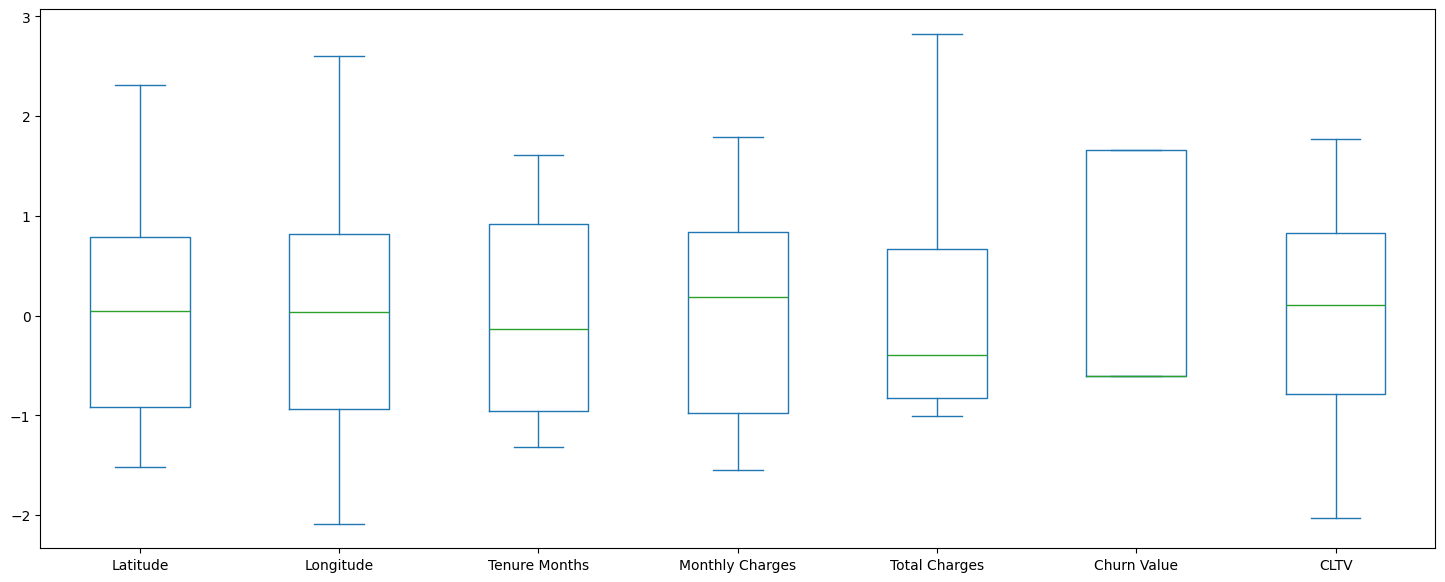

In [ ]:
# Selecionados as variáveis numéricas para verificar sua distribuição
numeric_cols = df.select_dtypes('number').columns
df[numeric_cols].apply(scale).plot.box(figsize=(18,7));

In [ ]:
# Separando o target das features
df_features = df.drop(columns='Churn Value')
target = df['Churn Value']

In [ ]:
# Separando as colunas por tipo
numerical_cols = df_features.select_dtypes('number').columns
categorical_cols = df_features.select_dtypes(exclude='number').columns

In [ ]:
# Padronização das colunas numéricas e codificação one-hot das colunas categóricas
preprocessing = ColumnTransformer([
    ('numerical_preprocessing', StandardScaler(), numerical_cols),
    ('categorical_preprocessing', OneHotEncoder(), categorical_cols)
])

preprocessing.fit(df_features)

ColumnTransformer(transformers=[('numerical_preprocessing', StandardScaler(),
                                 Index(['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'Total Charges', 'CLTV'],
      dtype='object')),
                                ('categorical_preprocessing', OneHotEncoder(),
                                 Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
      dtype='object'))])

In [ ]:
preprocessing.get_feature_names_out()

array(['numerical_preprocessing__Latitude',
       'numerical_preprocessing__Longitude',
       'numerical_preprocessing__Tenure Months',
       'numerical_preprocessing__Monthly Charges',
       'numerical_preprocessing__Total Charges',
       'numerical_preprocessing__CLTV',
       'categorical_preprocessing__Gender_Female',
       'categorical_preprocessing__Gender_Male',
       'categorical_preprocessing__Senior Citizen_No',
       'categorical_preprocessing__Senior Citizen_Yes',
       'categorical_preprocessing__Partner_No',
       'categorical_preprocessing__Partner_Yes',
       'categorical_preprocessing__Dependents_No',
       'categorical_preprocessing__Dependents_Yes',
       'categorical_preprocessing__Phone Service_No',
       'categorical_preprocessing__Phone Service_Yes',
       'categorical_preprocessing__Multiple Lines_No',
       'categorical_preprocessing__Multiple Lines_No phone service',
       'categorical_preprocessing__Multiple Lines_Yes',
       'categorical_pr

In [ ]:
pd.DataFrame(
    data=preprocessing.transform(df_features),
    columns=preprocessing.get_feature_names_out()
)

numerical_preprocessing__Latitude  numerical_preprocessing__Longitude  \
0                             -0.944111                            0.707268   
1                             -0.905362                            0.691215   
2                             -0.909951                            0.697457   
3                             -0.904204                            0.687374   
4                             -0.913530                            0.710276   
...                                 ...                                 ...   
7038                          -0.790334                            1.510595   
7039                          -0.657542                            1.048644   
7040                          -0.701497                            1.928742   
7041                          -0.861169                            1.360014   
7042                          -0.756456                            1.211630   

      numerical_preprocessing__Tenure Months  \
0                                  -1.236724   
1                                  -1.236724   
2                                  -0.992402   
3                                  -0.177995   
4                                   0.677133   
...                                      ...   
7038                                1.613701   
7039                               -0.340876   
7040                                1.613701   
7041                               -0.870241   
7042                                1.369379   

      numerical_preprocessing__Monthly Charges  \
0                                    -0.362660   
1                                     0.197365   
2                                     1.159546   
3                                     1.330711   
4                                     1.294151   
...                                        ...   
7038                                 -1.449476   
7039                                  0.665992   
7040                                  1.277533   
7041                                 -1.168632   
7042                                  1.358961   

      numerical_preprocessing__Total Charges  numerical_preprocessing__CLTV  \
0                                  -0.958066                      -0.981675   
1                                  -0.938874                      -1.436462   
2                                  -0.643789                       0.821409   
3                                   0.338085                       0.509483   
4                                   1.216150                       0.794358   
...                                      ...                            ...   
7038                               -0.379565                       0.765617   
7039                               -0.127605                      -1.910691   
7040                                2.242606                       0.980330   
7041                               -0.852932                      -1.358692   
7042                                2.013897                       0.588943   

      categorical_preprocessing__Gender_Female  \
0                                          0.0   
1                                          1.0   
2                                          1.0   
3                                          1.0   
4                                          0.0   
...                                        ...   
7038                                       1.0   
7039                                       0.0   
7040                                       1.0   
7041                                       1.0   
7042                                       0.0   

      categorical_preprocessing__Gender_Male  \
0                                        1.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        1.0   
...                                      

In [ ]:
df_mi = df.copy()

encoder = OrdinalEncoder()
df_mi[categorical_cols] = encoder.fit_transform(df_mi[categorical_cols]).astype(int)
df_mi.head()

Latitude   Longitude  Gender  Senior Citizen  Partner  \
CustomerID                                                           
3668-QPYBK  33.964131 -118.272783       1               0        0   
9237-HQITU  34.059281 -118.307420       0               0        0   
9305-CDSKC  34.048013 -118.293953       0               0        0   
7892-POOKP  34.062125 -118.315709       0               0        1   
0280-XJGEX  34.039224 -118.266293       1               0        0   

            Dependents  Tenure Months  Phone Service  Multiple Lines  \
CustomerID                                                             
3668-QPYBK           0              2              1               0   
9237-HQITU           1              2              1               0   
9305-CDSKC           1              8              1               2   
7892-POOKP           1             28              1               2   
0280-XJGEX           1             49              1               2   

            Internet Service  ...  Tech Support  Streaming TV  \
CustomerID                    ...                               
3668-QPYBK                 0  ...             0             0   
9237-HQITU                 1  ...             0             0   
9305-CDSKC                 1  ...             0             2   
7892-POOKP                 1  ...             2             2   
0280-XJGEX                 1  ...             0             2   

            Streaming Movies  Contract  Paperless Billing  Payment Method  \
CustomerID                                                                  
3668-QPYBK                 0         0                  1               3   
9237-HQITU                 0         0                  1               2   
9305-CDSKC                 2         0                  1               2   
7892-POOKP                 2         0                  1               2   
0280-XJGEX                 2         0                  1               0   

            Monthly Charges  Total Charges  Churn Value  CLTV  
CustomerID                                                     
3668-QPYBK            53.85         108.15            1  3239  
9237-HQITU            70.70         151.65            1  2701  
9305-CDSKC            99.65         820.50            1  5372  
7892-POOKP           104.80        3046.05            1  5003  
0280-XJGEX           103.70        5036.30            1  5340  

[5 rows x 23 columns]

In [ ]:
# Salvando o arquivo
df_mi.to_csv('churn_df.csv', encoding='utf-8')